Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'isreal']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


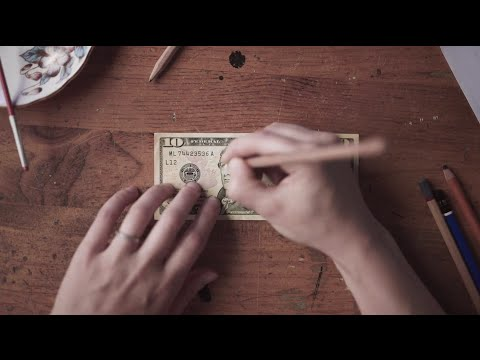

In [81]:
import sys
import os
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.optimize import minimize

%pylab inline
from IPython.display import YouTubeVideo
YouTubeVideo("G_ikzQM93W8")

In [3]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"

In [4]:
filename = 'pinc08_3_1_1.xls'
pd.read_excel(url + filename)

,Table with row headers in column A and column headers in rows 10 through 11,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,PINC-08. Source of Income in 2013- People 15 Y...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Data are based on the CPS ASEC sample of 68,00...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"For information on confidentiality protection,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Source: U.S. Census Bureau, Current Population...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(Numbers in thousands. People 15 Years old and...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15 Years and Over,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,All Races,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,NaN,Mean income,NaN,Gini ratio,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror


In [6]:
allfemales = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None }
allmales = {'all':None, 'white':None, 'black':None, 'hispanic':None, 'asian':None }

In [7]:
allfemales["all"] = pd.read_excel( url + filename,  header=9)
filename2 = 'pinc08_2_1_1.xls'
allmales["all"] = pd.read_excel( url + filename2,  header=9)

In [8]:
allfemales['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956.0,7590.0,4298.0,5557.0,7874.0,8052.0,5720.0,6768.0,4377.0,...,167.0,285.0,184.0,4442.0,22063,137,31968,250,0.495,0.0025
2,Earnings,74545.0,4198.0,3118.0,3269.0,2662.0,4579.0,1994.0,4134.0,2585.0,...,60.0,236.0,127.0,3535.0,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220.0,3835.0,2954.0,3005.0,2411.0,4309.0,1941.0,3908.0,2484.0,...,61.0,233.0,126.0,3370.0,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694.0,1282.0,288.0,410.0,253.0,388.0,84.0,265.0,126.0,...,0.0,0.0,0.0,127.0,10732,399,20942,1123,0.65,0.0162


In [9]:
allfemales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [10]:
allmales["white"] = pd.read_excel( url + 'pinc08_2_1_4.xls',  header=9)
allmales["black"] = pd.read_excel( url + 'pinc08_2_1_6.xls',  header=9)
allmales["asian"] = pd.read_excel( url + 'pinc08_2_1_8.xls',  header=9)
allmales["hispanic"] = pd.read_excel( url + 'pinc08_2_1_9.xls',  header=9)

In [11]:
allfemales["white"] = pd.read_excel( url + 'pinc08_3_1_4.xls',  header=9)
allfemales["black"] = pd.read_excel( url + 'pinc08_3_1_6.xls',  header=9)
allfemales["asian"] = pd.read_excel( url + 'pinc08_3_1_8.xls',  header=9)
allfemales["hispanic"] = pd.read_excel( url + 'pinc08_3_1_9.xls',  header=9)

In [12]:
for gender in [allmales, allfemales]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #i f some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
for k,v in allfemales.items():
    print ("#####", k)
    print (v.describe())

('#####', 'hispanic')
       Characteristic  Total with Income  $1 to $2,499 or loss  \
count             0.0          46.000000             46.000000   
mean              NaN        1908.739130            274.282609   
std               NaN        3688.718088            568.547923   
min               NaN           1.000000              0.000000   
25%               NaN                NaN                   NaN   
50%               NaN                NaN                   NaN   
75%               NaN                NaN                   NaN   
max               NaN       14034.000000           2704.000000   

       $2,500 to $4,999  $5,000 to $7,499  $7,500 to $9,999  \
count         46.000000         46.000000         46.000000   
mean         137.717391        154.043478        188.913043   
std          199.157298        259.111813        321.948569   
min            0.000000          0.000000          0.000000   
25%                 NaN               NaN               NaN   
50%  

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


       Characteristic  Total with Income  $1 to $2,499 or loss  \
count             0.0          46.000000             46.000000   
mean              NaN       17383.000000           2971.826087   
std               NaN       28945.070201           7604.959824   
min               NaN          84.000000              0.000000   
25%               NaN                NaN                   NaN   
50%               NaN                NaN                   NaN   
75%               NaN                NaN                   NaN   
max               NaN      109956.000000          38367.000000   

       $2,500 to $4,999  $5,000 to $7,499  $7,500 to $9,999  \
count         46.000000         46.000000         46.000000   
mean        1010.608696       1148.869565       1470.391304   
std         1190.210877       1569.333455       2365.722680   
min            6.000000          0.000000          2.000000   
25%                 NaN               NaN               NaN   
50%                 NaN    

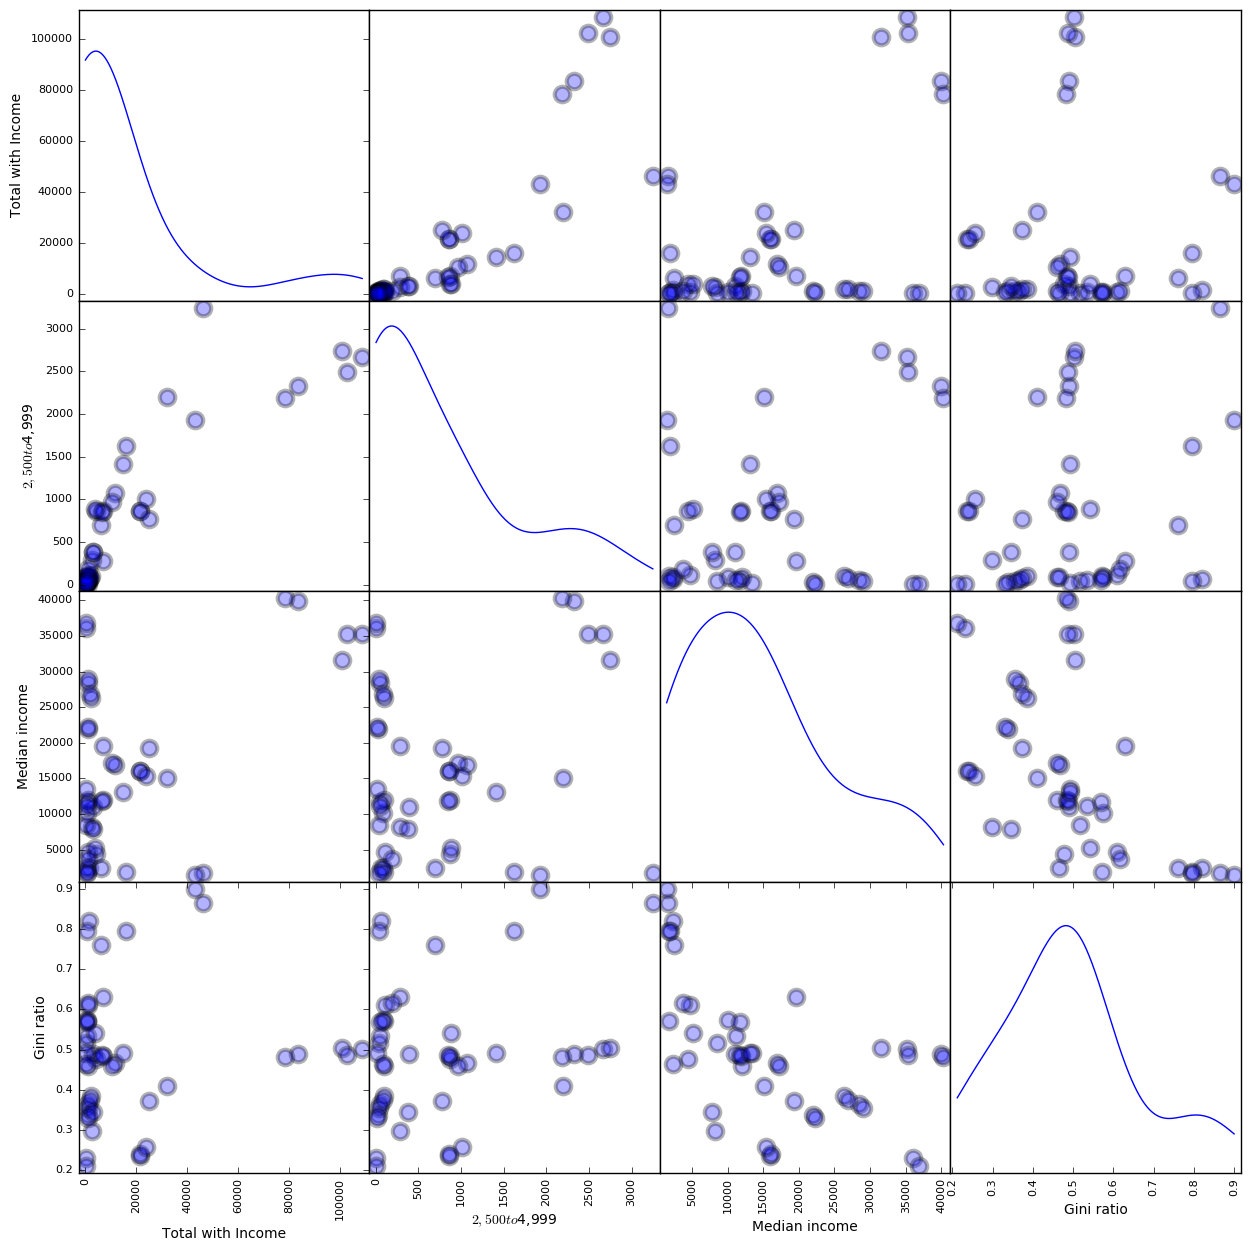

In [14]:
fig = pd.scatter_matrix(allmales['all']
                        [[u'Total with Income', u'$2,500 to $4,999',
                         u'Median income', u'Gini ratio']],
                        linewidth = 3, s = 500, figsize = (15,15), alpha = 0.3, 
                        diagonal = 'kde')

# FBB missing caption

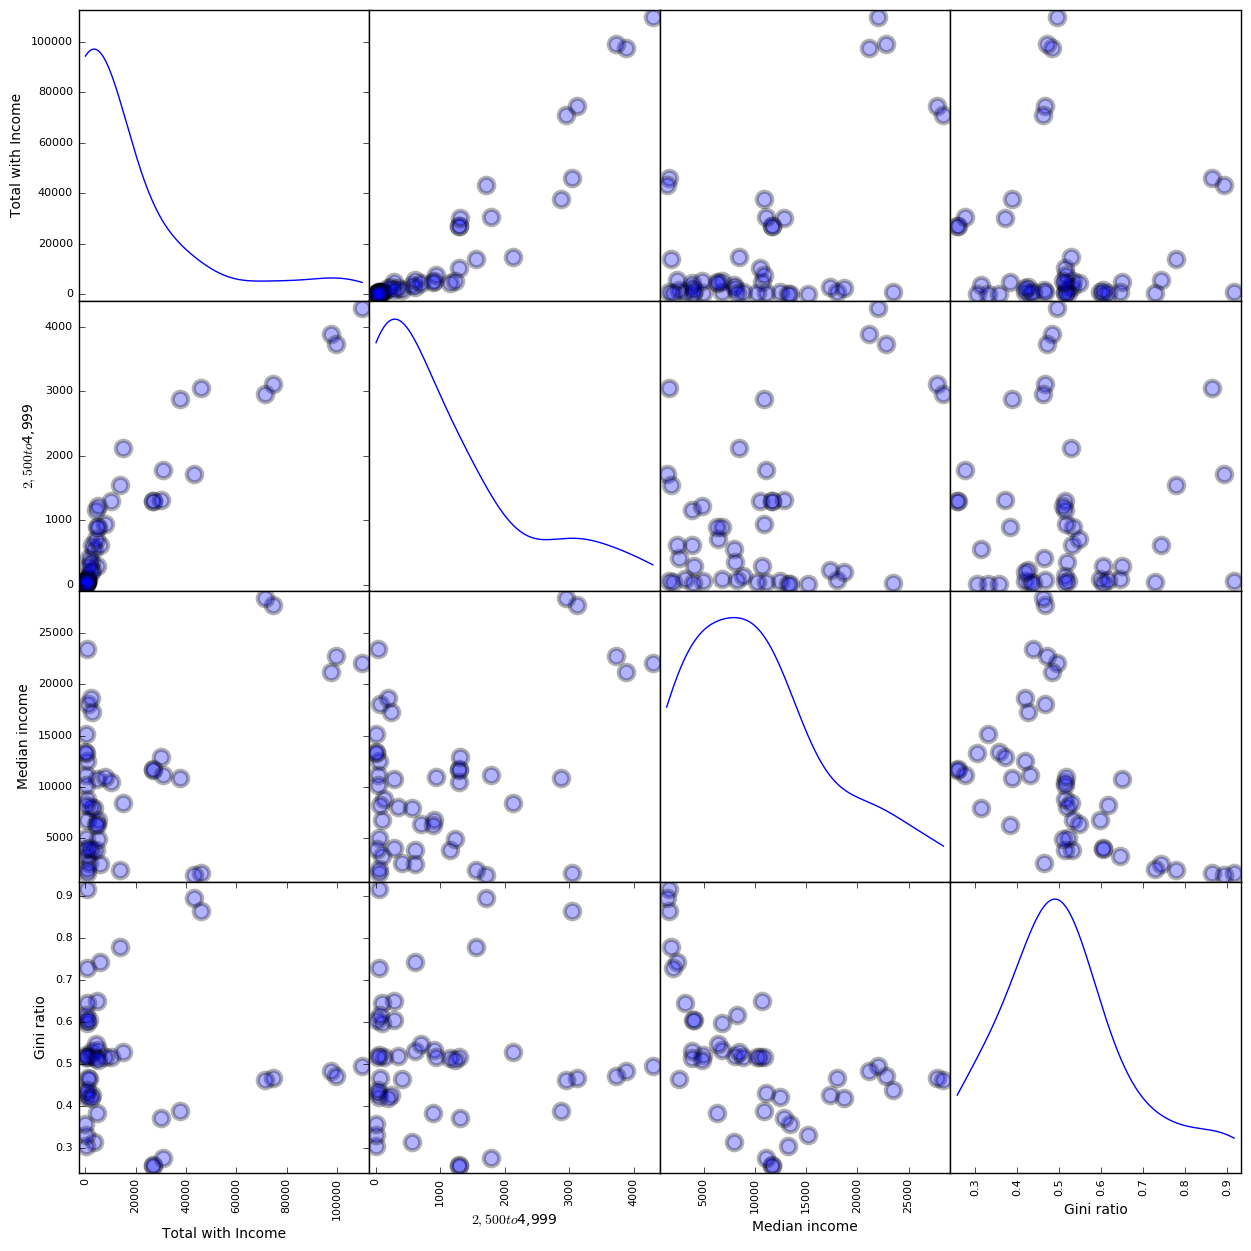

In [15]:
fig = pd.scatter_matrix(allfemales['all']
                        [[u'Total with Income', u'$2,500 to $4,999',
                         u'Median income', u'Gini ratio']],
                        linewidth = 3, s = 500, figsize = (15,15), alpha = 0.3,
                            diagonal = 'kde')

# FBB missing caption

## 3. Total Median Income in different races

In [16]:
medianIncome = pd.DataFrame()
for i in [allmales]:
    for key,value in i.iteritems():
        medianIncome.set_value(key, 'male', value[u'Median income'][1])

for i in [allfemales]:
    for key, value in i.iteritems():
        medianIncome.set_value(key, 'female', value[u'Median income'][1])

In [17]:
print medianIncome

             male   female
hispanic  25411.0  17762.0
all       35228.0  22063.0
black     24855.0  20044.0
white     40122.0  23780.0
asian     40153.0  24840.0


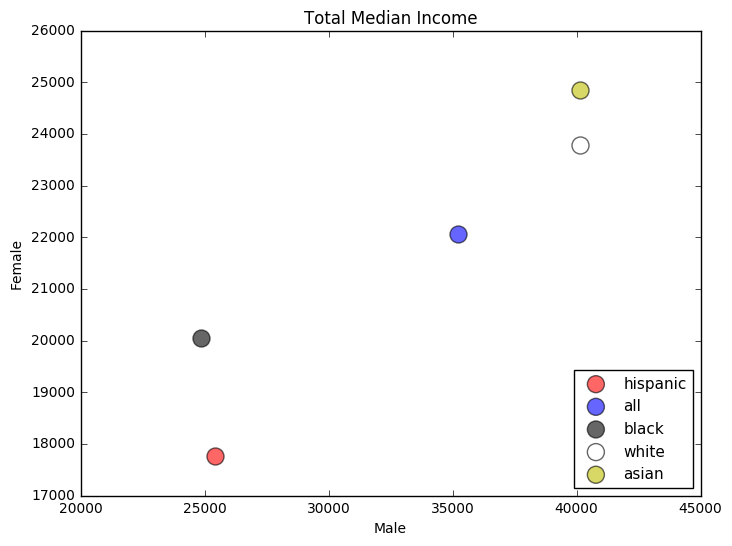

In [247]:
fig2 = plt.figure(figsize = (8,6))
colors = ['r','b', 'k', 'w','y']
for i in range(len(medianIncome.index)):
    plt.scatter(medianIncome['male'][i],medianIncome['female'][i],c=colors[i],s= 150, alpha = 0.6)
plt.legend(medianIncome.index, loc = 'lower right', scatterpoints = 1, fontsize = 11)
plt.title('Total Median Income')
plt.xlabel('Male')
plt.ylabel('Female')
    
plt.show()

# FBB missing caption. the caption should describe what we see and indicte an interpretation. You should have the x=y line here, which would allow you to point out that all datapoints are below the line, indicating inequality in income

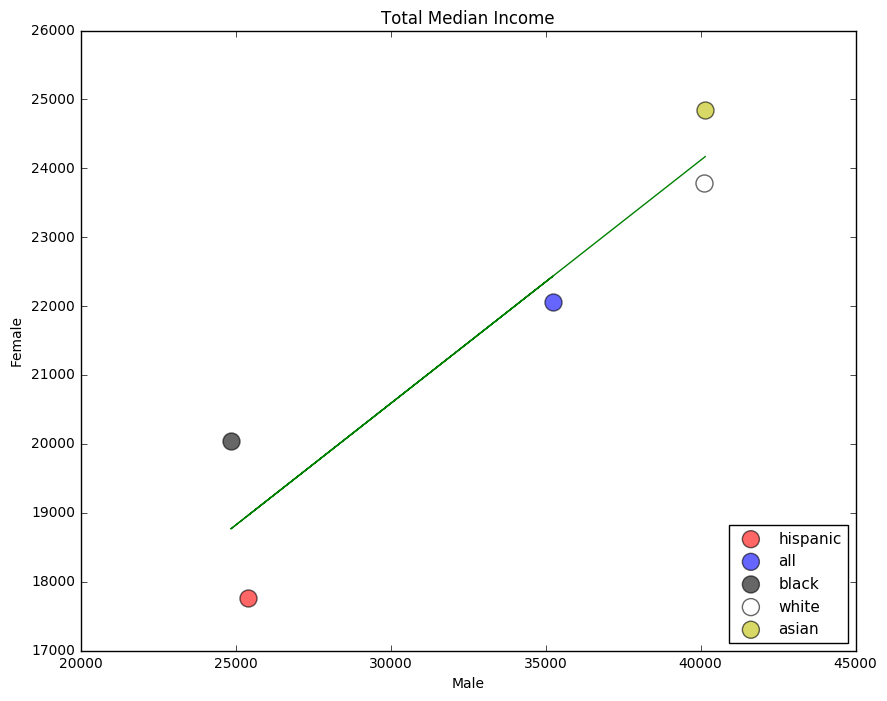

In [20]:
y = medianIncome['female']
x = medianIncome['male']
fit = np.polyfit(x, y, deg=1)

fig3 = plt.figure(figsize = (10,8))
colors = ['r','b', 'k', 'w','y']
for i in range(len(medianIncome.index)):
    plt.scatter(medianIncome['male'][i],medianIncome['female'][i],c=colors[i],s= 150, alpha = 0.6)
plt.legend(medianIncome.index, loc = 'lower right', scatterpoints = 1, fontsize = 11)
plt.plot(x, fit[0] * x + fit[1], color='g', label = 'Prediction')
plt.title('Total Median Income')
plt.xlabel('Male')
plt.ylabel('Female')
plt.show()


# FBB missing caption: what does the line fot say? what is the slope. How does it relate to income inequality

## 4. Fit the data with a line

In [21]:
#this is the analytical best regression line. 
# it can be proved (ask me about it if you want!)
# run the cell below to get the beta0 and beta1 values
from scipy import stats
all_males=np.array([0., allmales['all']['Median income'][1],
                    allmales['white']['Median income'][1],
                    allmales['black']['Median income'][1],
                     allmales['hispanic']['Median income'][1],
                    allmales['asian']['Median income'][1]])

all_females=np.array([0.] + [allfemales[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hispanic','asian']])
cor = stats.spearmanr(all_males, all_females)
beta1 = cor[0] * all_females.std() / all_males.std()
beta0 = all_females.mean() - beta1 * all_males.mean()
beta0, beta1

(2224.3609760454674, 0.57394829035421091)

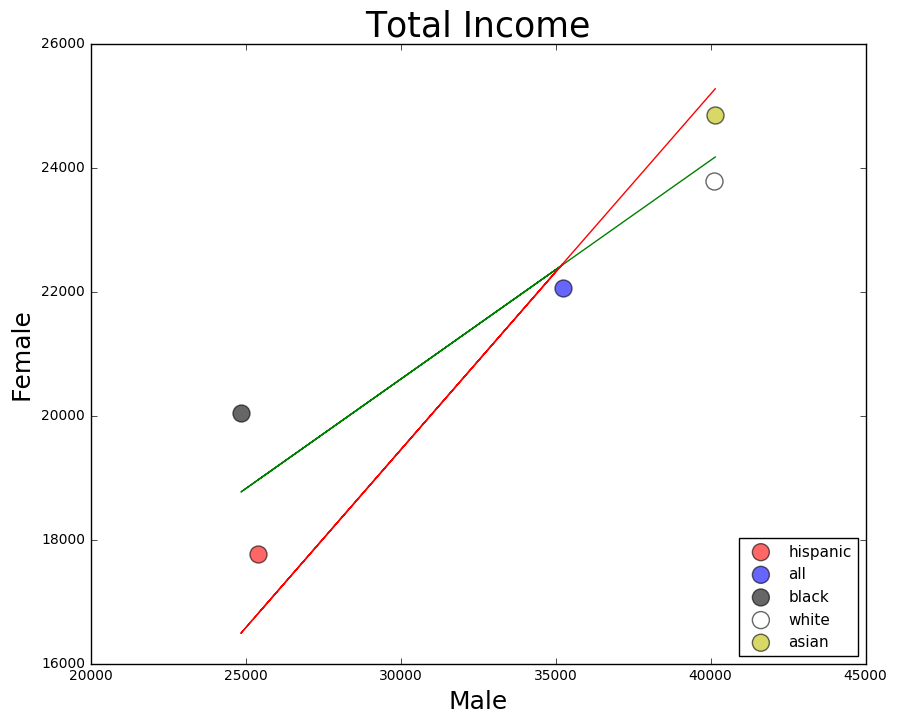

In [22]:
fig4 = plt.figure(figsize = (10,8))

colors = ['r','b', 'k', 'w','y']
for i in range(len(medianIncome.index)):
    plt.scatter(medianIncome['male'][i],medianIncome['female'][i],c=colors[i],s= 150, alpha = 0.6)

plt.legend(medianIncome.index, loc = 'lower right', scatterpoints = 1, fontsize = 11)

fit = np.polyfit(x, y, deg=1)
plt.plot(x, fit[0] * x + fit[1], color = 'g', label = 'Prediction')

linfit = lambda x, slope, intercept: slope*x + intercept
plt.plot(x, linfit(x, beta1, beta0), linewidth = 1, color='red', label = 'Analytical Regression')


plt.xlabel("Male", fontsize=18)
plt.ylabel("Female", fontsize=18)
plt.title("Total Income", fontsize=25)


# FBB missing caption: why are the slopes different?

## 5. Comparison of Numerical and Analytical Method

In [23]:
all_males_allincomes = np.array(
    np.concatenate([allmales['all']['Median income'][:].values,
                    allmales['white']['Median income'][:].values,
                    allmales['black']['Median income'][:].values,
                    allmales['hispanic']['Median income'][:].values,
                    allmales['asian']['Median income'][:].values]).flatten())
#with a list comprehension syntax, but the result i the same as above
all_females_allincomes = np.array(
    np.concatenate([allfemales[k]['Median income'][:].values \
                    for k in ['all',
                                   'white', 'black', 
                                    'hispanic', 'asian']]).flatten())

mask = ~(np.isnan(all_males_allincomes) + np.isnan(all_females_allincomes))


In [39]:
params_all = np.polyfit(all_males_allincomes[mask], all_females_allincomes[mask], 1)
cor = stats.spearmanr(all_males_allincomes[mask], all_females_allincomes[mask])
beta1_all = cor[0] * all_females_allincomes[mask].std() / all_males_allincomes[mask].std()
beta0_all = all_females_allincomes[mask].mean() - beta1 * all_males_allincomes[mask].mean()

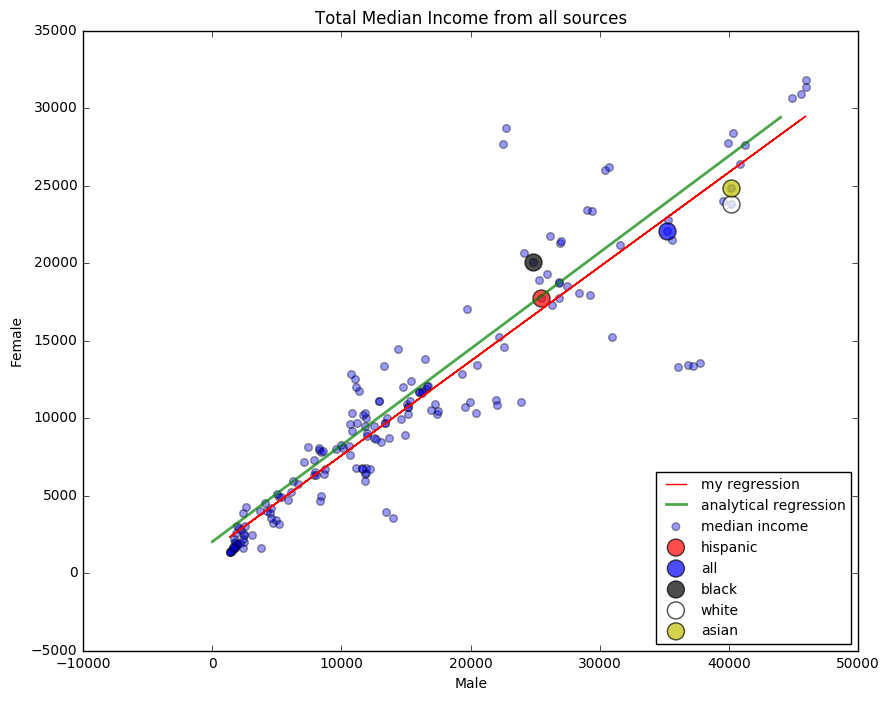

In [75]:

fig6 = plt.figure(figsize=(10,8))

plt.scatter(all_males_allincomes[mask], all_females_allincomes[mask], s= 30, alpha = 0.4)

colors = ['r','b', 'k', 'w','y']
for i in range(len(medianIncome.index)):
    plt.scatter(medianIncome['male'][i],medianIncome['female'][i],c=colors[i],s= 150, alpha = 0.7)
a = all_males_allincomes[mask]
b = all_females_allincomes[mask]
fit1 = np.polyfit(a, b, deg=1)
plt.plot(a, fit1[0] * a + fit1[1], color = 'r', label = 'Prediction')

plt.plot(np.arange(0,45000,1000), linfit(np.arange(0,45000,1000), beta1_all, beta0_all), linewidth = 2, color='g', alpha=0.7)
plt.legend(['my regression'] + ['analytical regression']+ ['median income'] + 
           list(medianIncome.index),
           scatterpoints=1,
           loc='lower right',
           fontsize = 10)
plt.title('Total Median Income from all sources')
plt.xlabel('Male')
plt.ylabel('Female')

# FBB missing caption: this section has comparison in the title but i do not see you comparing anything

## 6. Linear Regression Fit for Female and Male Median Incomes¶

In [80]:
myStipend = 80000
womenStipend = fit1[0]* myStipend + fit1[1]
print 'When men get %s dollars, women get %s dollars.' % (myStipend, int(womenStipend))

When men get 80000 dollars, women get 50214 dollars.


## 7. Lastly do you have any comments about what these data tell us about race?

##### The stipend gap between genders in asian or white people is larger than that in black and hispanic people. Therefore, I will compare this gap, that is- conducting linear regression for each race. And the I will draw a null hypothesis to figure that whether there is a difference between  male/female's stigend distribution in each race.

# FBB  that is a fine idea, but not only because we are comparing without knowing the job position, olso, importantly, because ethnicity is covariant with income, which may invalidate the analysis (see my solution)¶
